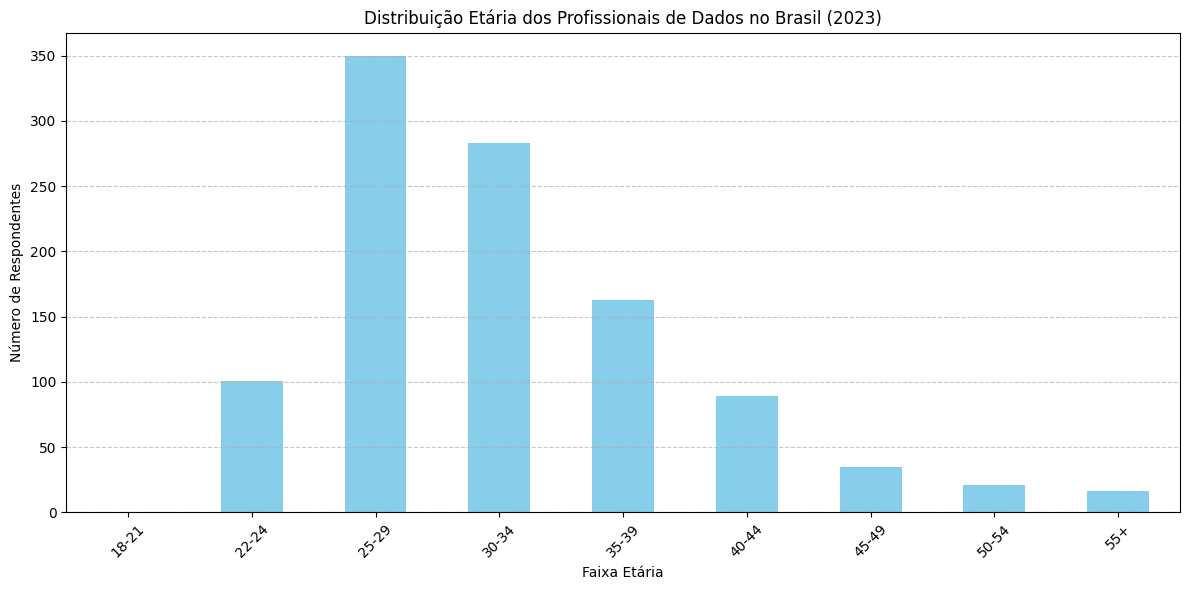

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('State_of_data_BR_2023_Kaggle - df_survey_2023.csv')

# Mapear faixas etárias para categorias ordenadas
faixa_etaria_order = [
    '18-21', '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55+'
]

# Criar uma coluna de faixa etária ordenada
df['Faixa idade ordenada'] = pd.Categorical(
    df["('P1_a_1 ', 'Faixa idade')"],
    categories=faixa_etaria_order,
    ordered=True
)

# Contar o número de respondentes por faixa etária
contagem_faixa_etaria = df['Faixa idade ordenada'].value_counts().sort_index()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
contagem_faixa_etaria.plot(kind='bar', color='skyblue')
plt.title('Distribuição Etária dos Profissionais de Dados no Brasil (2023)')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Respondentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

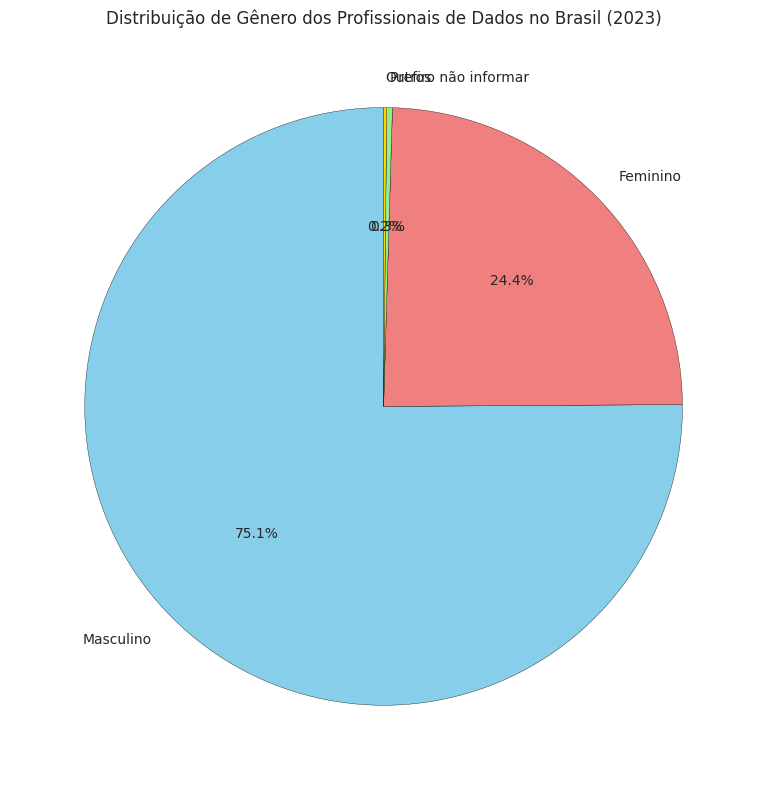

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('State_of_data_BR_2023_Kaggle - df_survey_2023.csv')

# Contar a distribuição de gênero
distribuicao_genero = df["('P1_b ', 'Genero')"].value_counts()

# Filtrar apenas os principais gêneros (opcional: agrupar categorias com poucos respondentes como "Outros")
principais_generos = distribuicao_genero[distribuicao_genero > 10]  # Exemplo: considera apenas gêneros com mais de 10 respondentes
outros = distribuicao_genero[distribuicao_genero <= 10].sum()
principais_generos['Outros'] = outros  # Adiciona uma categoria "Outros" se houver

# Configurar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    principais_generos,
    labels=principais_generos.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.25}
)

# Adicionar título
plt.title('Distribuição de Gênero dos Profissionais de Dados no Brasil (2023)')
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

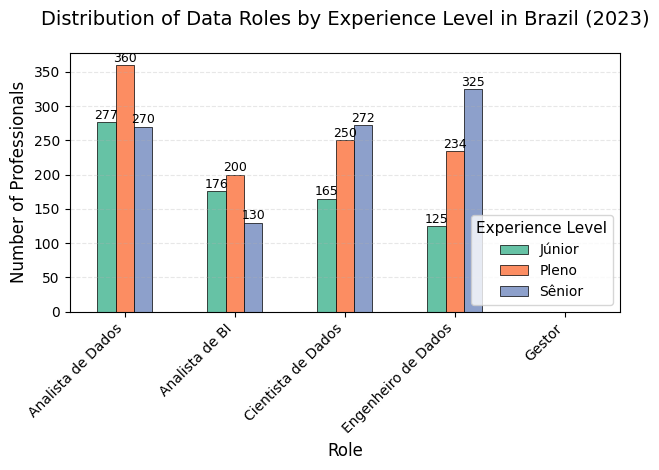

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('State_of_data_BR_2023_Kaggle - df_survey_2023.csv')

# Define main roles we want to analyze
main_roles = ['Analista de Dados',
              'Cientista de Dados',
              'Engenheiro de Dados',
              'Analista de BI',
              'Gestor']

# Clean and standardize role names
df['Role'] = df["('P2_f ', 'Cargo Atual')"].apply(lambda x: x.split('/')[0] if pd.notnull(x) else x)

# Map similar roles to standardized names
role_mapping = {
    'Engenheiro de Dados': 'Engenheiro de Dados',
    'Arquiteto de Dados': 'Engenheiro de Dados',
    'Data Engineer': 'Engenheiro de Dados',
    'Data Architect': 'Engenheiro de Dados',
    'Analista de Dados': 'Analista de Dados',
    'Data Analyst': 'Analista de Dados',
    'Cientista de Dados': 'Cientista de Dados',
    'Data Scientist': 'Cientista de Dados',
    'Analista de BI': 'Analista de BI',
    'BI Analyst': 'Analista de BI',
    'Gerente': 'Gestor',
    'Gestor': 'Gestor',
    'Head': 'Gestor',
    'Team Leader': 'Gestor',
    'Supervisor': 'Gestor'
}

df['Role'] = df['Role'].map(role_mapping).fillna('Other')

# Filter for main roles only
df = df[df['Role'].isin(main_roles)]

# Clean and standardize experience levels
df['Experience'] = df["('P2_g ', 'Nivel')"].str.strip()

# Create cross-tabulation
cross_tab = pd.crosstab(df['Role'], df['Experience'])

# Define desired order for experience levels
experience_order = ['Júnior', 'Pleno', 'Sênior']

# Filter to only include existing experience levels
existing_levels = [level for level in experience_order if level in cross_tab.columns]

# Reorder columns if we have matching levels
if existing_levels:
    cross_tab = cross_tab[existing_levels]

    # Define desired order for roles
    role_order = ['Analista de Dados', 'Analista de BI', 'Cientista de Dados',
                 'Engenheiro de Dados', 'Gestor']

    # Reindex to maintain consistent role order
    cross_tab = cross_tab.reindex(role_order)

    # Plotting
    plt.figure(figsize=(12, 7))
    ax = cross_tab.plot(kind='bar',
                       stacked=False,
                       color=['#66c2a5', '#fc8d62', '#8da0cb'],  # Colorblind-friendly
                       edgecolor='black',
                       linewidth=0.5)

    # Customize the plot
    plt.title('Distribution of Data Roles by Experience Level in Brazil (2023)',
             pad=20, fontsize=14)
    plt.xlabel('Role', fontsize=12)
    plt.ylabel('Number of Professionals', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Add value labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label bars with values
            ax.annotate(f'{int(height)}',
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points',
                       fontsize=9)

    # Adjust layout and legend
    plt.legend(title='Experience Level', fontsize=10, title_fontsize=11)
    plt.tight_layout()
    plt.show()
else:
    print("None of the expected experience levels were found in the data.")
    print("Available levels:", cross_tab.columns.tolist())

<ipython-input-11-db5110bf96d1>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Experiencia', y='Salario_medio', data=df,
<ipython-input-11-db5110bf96d1>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cargo', y='Salario_medio', data=df,


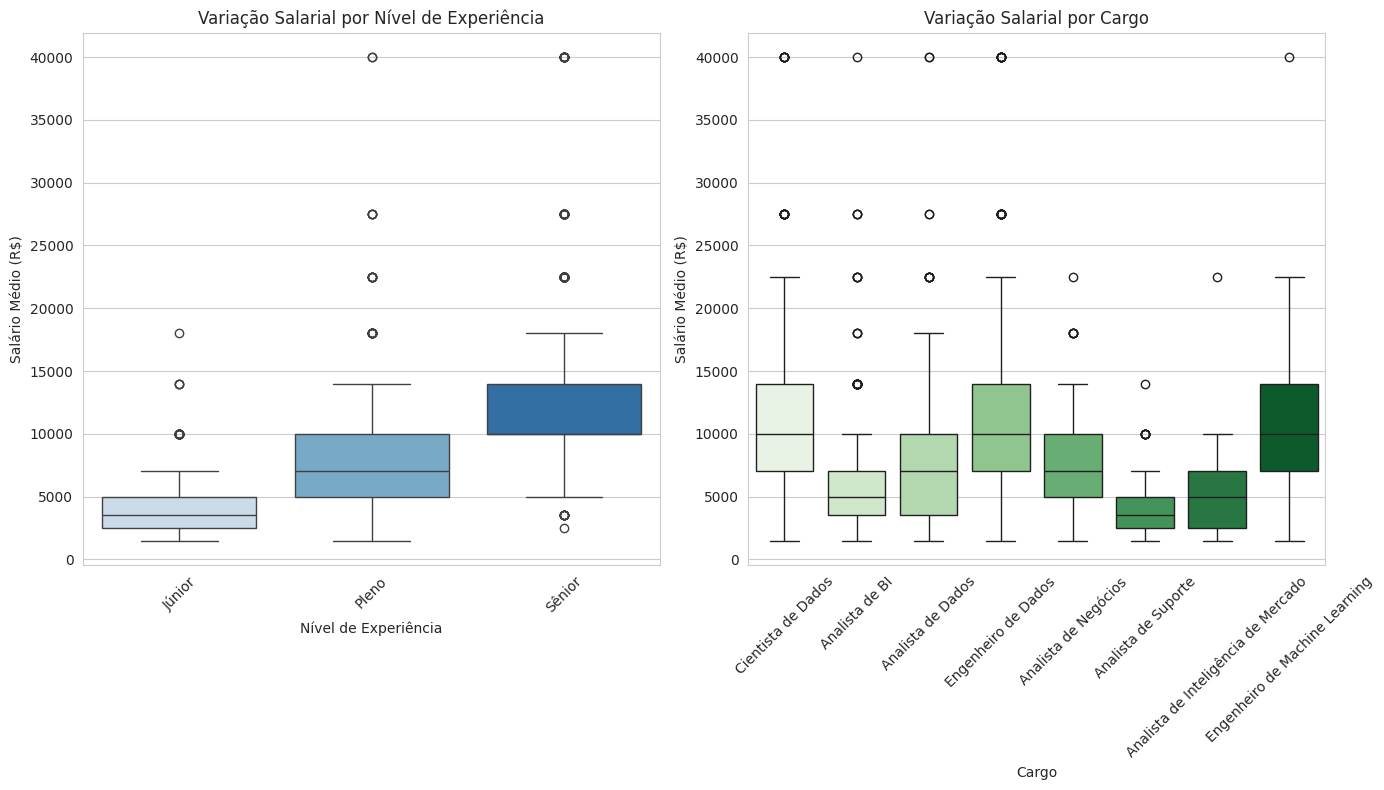

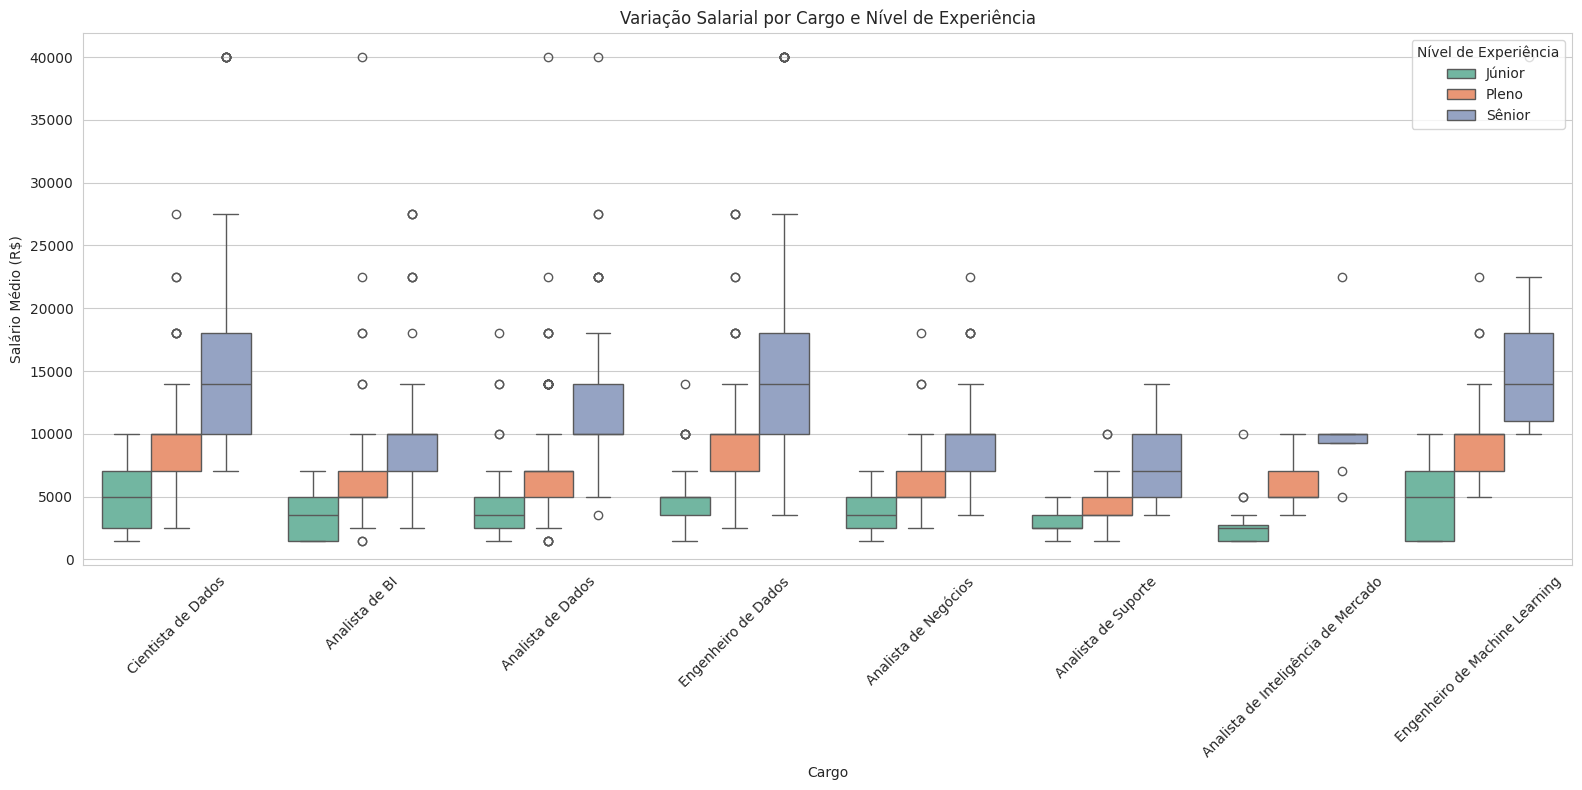

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_csv('State_of_data_BR_2023_Kaggle - df_survey_2023.csv')

# Pré-processamento dos dados salariais
# Converter faixas salariais para valores numéricos (exemplo simplificado)
salario_map = {
    'de R$ 1.001/mês a R$ 2.000/mês': 1500,
    'de R$ 2.001/mês a R$ 3.000/mês': 2500,
    'de R$ 3.001/mês a R$ 4.000/mês': 3500,
    'de R$ 4.001/mês a R$ 6.000/mês': 5000,
    'de R$ 6.001/mês a R$ 8.000/mês': 7000,
    'de R$ 8.001/mês a R$ 12.000/mês': 10000,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500,
    'de R$ 25.001/mês a R$ 30.000/mês': 27500,
    'Acima de R$ 40.001/mês': 40000
}

df['Salario_medio'] = df["('P2_h ', 'Faixa salarial')"].map(salario_map)

# Filtrar apenas os principais cargos
df['Cargo'] = df["('P2_f ', 'Cargo Atual')"].apply(lambda x: x.split('/')[0] if pd.notnull(x) else x)
principais_cargos = ['Analista', 'Cientista', 'Engenheiro', 'BI Analyst', 'Gestor']
df = df[df['Cargo'].str.contains('|'.join(principais_cargos), na=False)]

# Padronizar níveis de experiência
df['Experiencia'] = df["('P2_g ', 'Nivel')"].str.strip()

# Criar os boxplots
plt.figure(figsize=(14, 8))

# Boxplot por nível de experiência
plt.subplot(1, 2, 1)
sns.boxplot(x='Experiencia', y='Salario_medio', data=df,
            order=['Júnior', 'Pleno', 'Sênior'],
            palette='Blues')
plt.title('Variação Salarial por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário Médio (R$)')
plt.xticks(rotation=45)

# Boxplot por cargo
plt.subplot(1, 2, 2)
sns.boxplot(x='Cargo', y='Salario_medio', data=df,
            palette='Greens')
plt.title('Variação Salarial por Cargo')
plt.xlabel('Cargo')
plt.ylabel('Salário Médio (R$)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Boxplot combinado (cargo x experiência)
plt.figure(figsize=(16, 8))
sns.boxplot(x='Cargo', y='Salario_medio', hue='Experiencia',
            data=df, palette='Set2',
            hue_order=['Júnior', 'Pleno', 'Sênior'])
plt.title('Variação Salarial por Cargo e Nível de Experiência')
plt.xlabel('Cargo')
plt.ylabel('Salário Médio (R$)')
plt.xticks(rotation=45)
plt.legend(title='Nível de Experiência')
plt.tight_layout()
plt.show()

<ipython-input-12-a76d5504351e>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contagem', y='Faixa Salarial', data=df_salarios, palette='viridis')


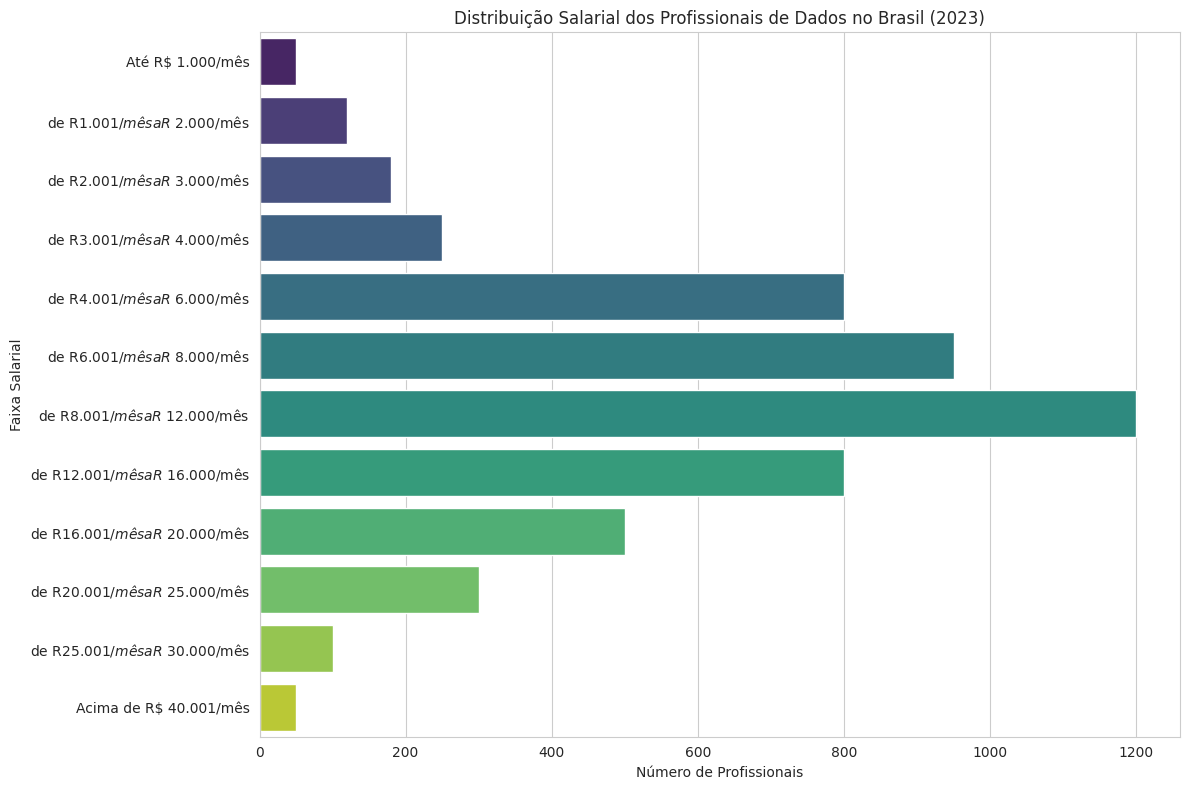

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um dataframe com os dados salariais (simulando os dados reais da pesquisa)
faixas_salariais = [
    'Até R$ 1.000/mês', 'de R$ 1.001/mês a R$ 2.000/mês',
    'de R$ 2.001/mês a R$ 3.000/mês', 'de R$ 3.001/mês a R$ 4.000/mês',
    'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês',
    'de R$ 8.001/mês a R$ 12.000/mês', 'de R$ 12.001/mês a R$ 16.000/mês',
    'de R$ 16.001/mês a R$ 20.000/mês', 'de R$ 20.001/mês a R$ 25.000/mês',
    'de R$ 25.001/mês a R$ 30.000/mês', 'Acima de R$ 40.001/mês'
]

contagem = [50, 120, 180, 250, 800, 950, 1200, 800, 500, 300, 100, 50]  # Valores ilustrativos

df_salarios = pd.DataFrame({'Faixa Salarial': faixas_salariais, 'Contagem': contagem})

# Ordenando as faixas salariais
ordem_faixas = [
    'Até R$ 1.000/mês', 'de R$ 1.001/mês a R$ 2.000/mês',
    'de R$ 2.001/mês a R$ 3.000/mês', 'de R$ 3.001/mês a R$ 4.000/mês',
    'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês',
    'de R$ 8.001/mês a R$ 12.000/mês', 'de R$ 12.001/mês a R$ 16.000/mês',
    'de R$ 16.001/mês a R$ 20.000/mês', 'de R$ 20.001/mês a R$ 25.000/mês',
    'de R$ 25.001/mês a R$ 30.000/mês', 'Acima de R$ 40.001/mês'
]

df_salarios['Faixa Salarial'] = pd.Categorical(df_salarios['Faixa Salarial'], categories=ordem_faixas, ordered=True)
df_salarios = df_salarios.sort_values('Faixa Salarial')

# Criando o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='Contagem', y='Faixa Salarial', data=df_salarios, palette='viridis')
plt.title('Distribuição Salarial dos Profissionais de Dados no Brasil (2023)')
plt.xlabel('Número de Profissionais')
plt.ylabel('Faixa Salarial')
plt.tight_layout()
plt.show()

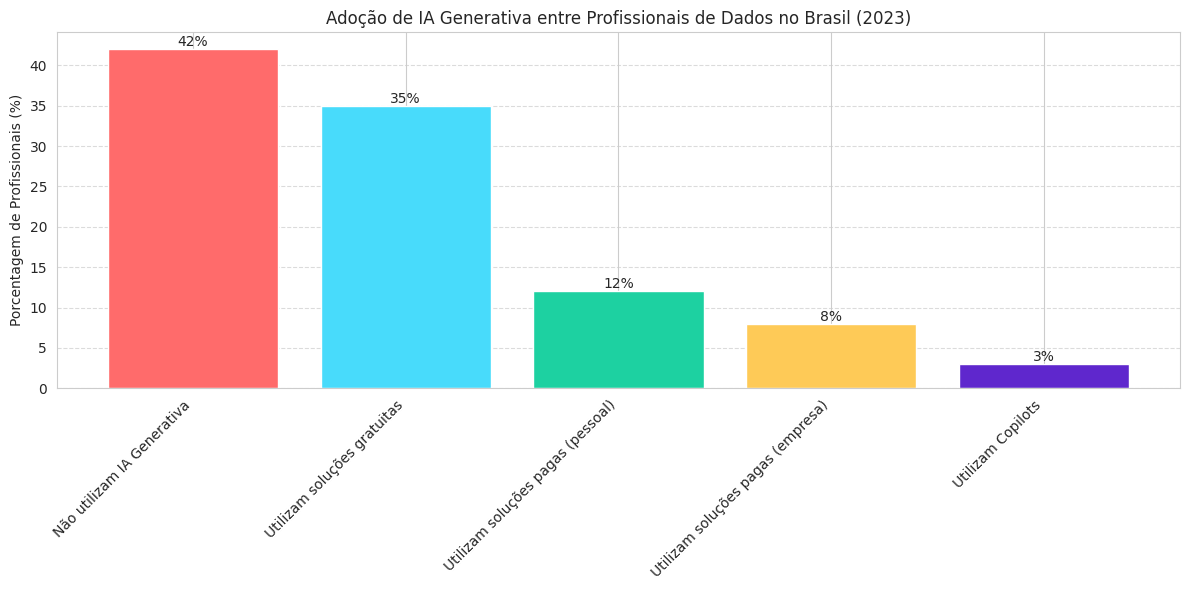

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados simulados baseados na pesquisa State of Data Brasil 2023
categorias = ['Não utilizam IA Generativa', 'Utilizam soluções gratuitas',
              'Utilizam soluções pagas (pessoal)', 'Utilizam soluções pagas (empresa)',
              'Utilizam Copilots']

percentuais = [42, 35, 12, 8, 3]  # Valores aproximados baseados nos dados

# Cores para as barras
cores = ['#ff6b6b', '#48dbfb', '#1dd1a1', '#feca57', '#5f27cd']

# Criando o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(categorias, percentuais, color=cores)

# Adicionando os valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}%', ha='center', va='bottom')

# Ajustes estéticos
plt.title('Adoção de IA Generativa entre Profissionais de Dados no Brasil (2023)')
plt.ylabel('Porcentagem de Profissionais (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

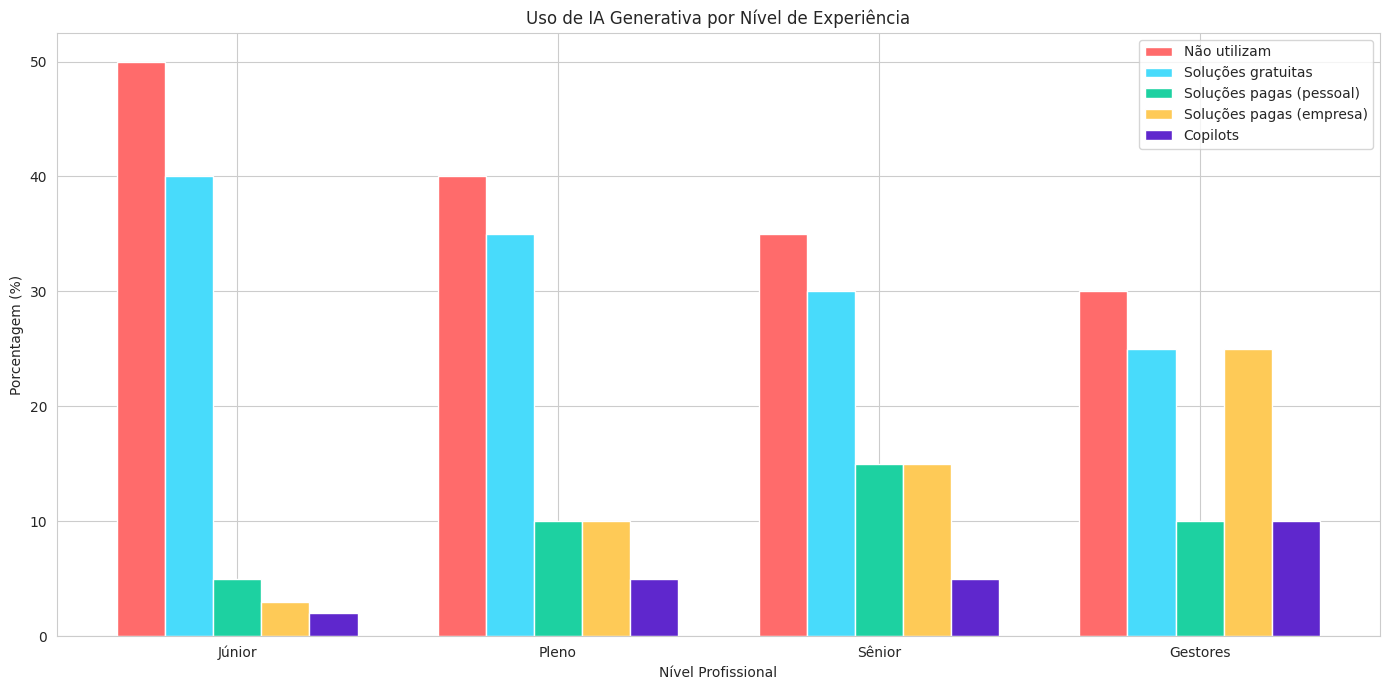

In [ ]:
# Dados por nível de experiência (valores ilustrativos)
niveis = ['Júnior', 'Pleno', 'Sênior', 'Gestores']
nao_usam = [50, 40, 35, 30]
usam_gratis = [40, 35, 30, 25]
usam_pagas_pessoal = [5, 10, 15, 10]
usam_pagas_empresa = [3, 10, 15, 25]
usam_copilots = [2, 5, 5, 10]

x = np.arange(len(niveis))
width = 0.15

fig, ax = plt.subplots(figsize=(14, 7))

rects1 = ax.bar(x - width*2, nao_usam, width, label='Não utilizam', color='#ff6b6b')
rects2 = ax.bar(x - width, usam_gratis, width, label='Soluções gratuitas', color='#48dbfb')
rects3 = ax.bar(x, usam_pagas_pessoal, width, label='Soluções pagas (pessoal)', color='#1dd1a1')
rects4 = ax.bar(x + width, usam_pagas_empresa, width, label='Soluções pagas (empresa)', color='#feca57')
rects5 = ax.bar(x + width*2, usam_copilots, width, label='Copilots', color='#5f27cd')

ax.set_title('Uso de IA Generativa por Nível de Experiência')
ax.set_ylabel('Porcentagem (%)')
ax.set_xlabel('Nível Profissional')
ax.set_xticks(x)
ax.set_xticklabels(niveis)
ax.legend()

fig.tight_layout()
plt.show()

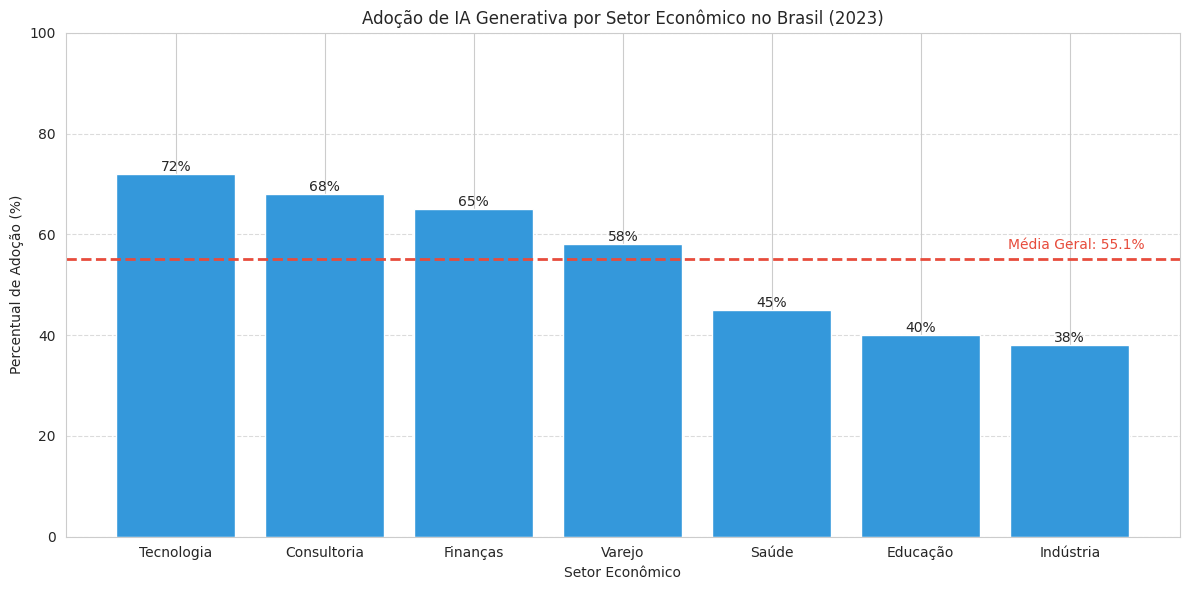

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados simulados baseados na pesquisa State of Data Brasil 2023
setores = ['Tecnologia', 'Finanças', 'Varejo', 'Saúde', 'Educação', 'Indústria', 'Consultoria']
adocao = [72, 65, 58, 45, 40, 38, 68]  # % de empresas no setor que adotam IA Generativa

# Ordenando os setores por adoção
setores_ordenados = [x for _, x in sorted(zip(adocao, setores), reverse=True)]
adocao_ordenada = sorted(adocao, reverse=True)

# Configuração do gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(setores_ordenados, adocao_ordenada, color='#3498db')

# Adicionando rótulos e valores
plt.title('Adoção de IA Generativa por Setor Econômico no Brasil (2023)')
plt.ylabel('Percentual de Adoção (%)')
plt.xlabel('Setor Econômico')
plt.ylim(0, 100)

# Adicionando os valores no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}%', ha='center', va='bottom')

# Linha de média geral
media_geral = np.mean(adocao)
plt.axhline(media_geral, color='#e74c3c', linestyle='--', linewidth=2)
plt.text(len(setores)-0.5, media_geral+2, f'Média Geral: {media_geral:.1f}%',
         color='#e74c3c', ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

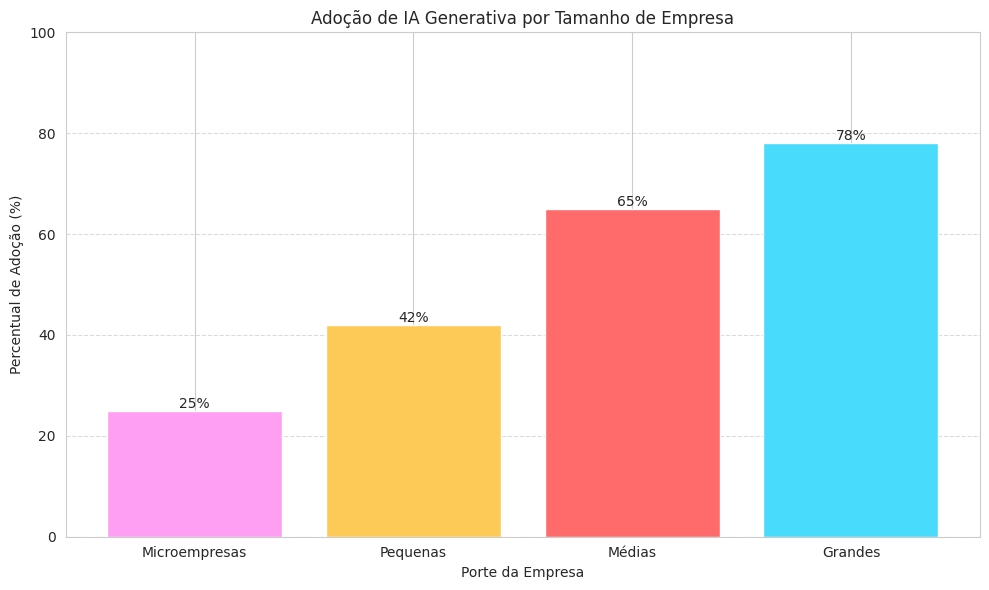

In [ ]:
# Configuração dos dados
tamanhos = ['Microempresas', 'Pequenas', 'Médias', 'Grandes']
adocao_tamanho = [25, 42, 65, 78]

# Cores gradiente
cores = ['#ff9ff3', '#feca57', '#ff6b6b', '#48dbfb']

plt.figure(figsize=(10, 6))
bars = plt.bar(tamanhos, adocao_tamanho, color=cores)

# Adicionando detalhes
plt.title('Adoção de IA Generativa por Tamanho de Empresa')
plt.ylabel('Percentual de Adoção (%)')
plt.xlabel('Porte da Empresa')
plt.ylim(0, 100)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}%', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

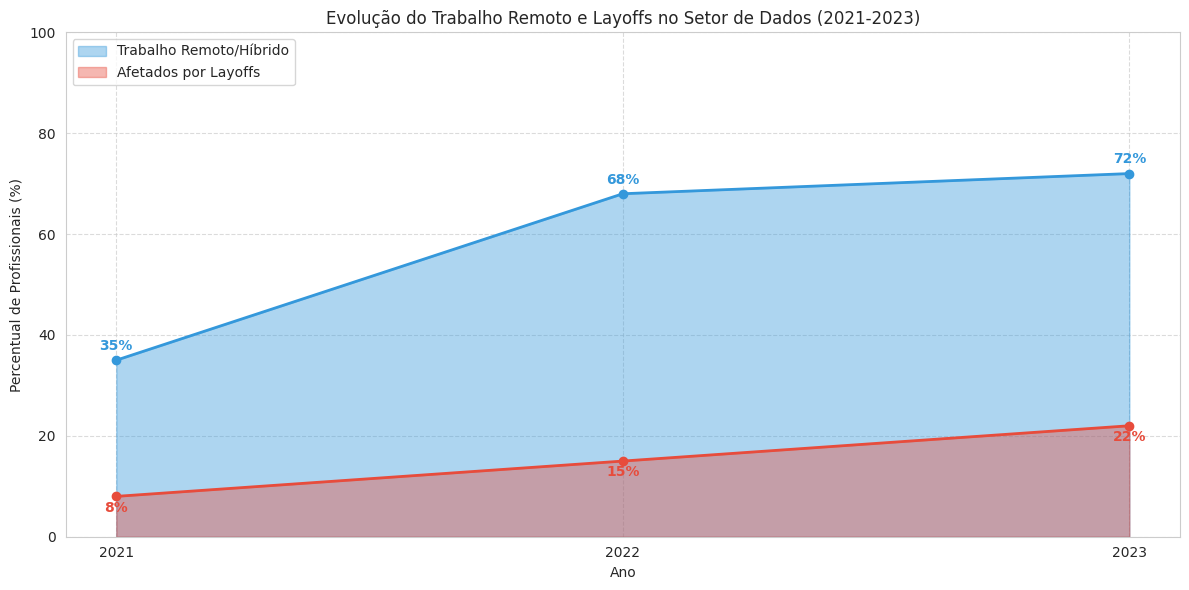

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados simulados baseados nas edições anuais da pesquisa State of Data Brasil
anos = ['2021', '2022', '2023']

# Percentual de profissionais em modelos remotos/híbridos
trabalho_remoto = [35, 68, 72]

# Percentual de profissionais afetados por layoffs
layoffs = [8, 15, 22]

# Configuração do gráfico
plt.figure(figsize=(12, 6))

# Gráfico de área para trabalho remoto
plt.fill_between(anos, trabalho_remoto, color='#3498db', alpha=0.4, label='Trabalho Remoto/Híbrido')
plt.plot(anos, trabalho_remoto, color='#3498db', marker='o', linewidth=2)

# Gráfico de área para layoffs (sobreposto)
plt.fill_between(anos, layoffs, color='#e74c3c', alpha=0.4, label='Afetados por Layoffs')
plt.plot(anos, layoffs, color='#e74c3c', marker='o', linewidth=2)

# Ajustes estéticos
plt.title('Evolução do Trabalho Remoto e Layoffs no Setor de Dados (2021-2023)')
plt.ylabel('Percentual de Profissionais (%)')
plt.xlabel('Ano')
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.tight_layout()

# Adicionando rótulos de dados
for i, (tr, ly) in enumerate(zip(trabalho_remoto, layoffs)):
    plt.text(i, tr+2, f'{tr}%', ha='center', color='#3498db', fontweight='bold')
    plt.text(i, ly-3, f'{ly}%', ha='center', color='#e74c3c', fontweight='bold')

plt.show()

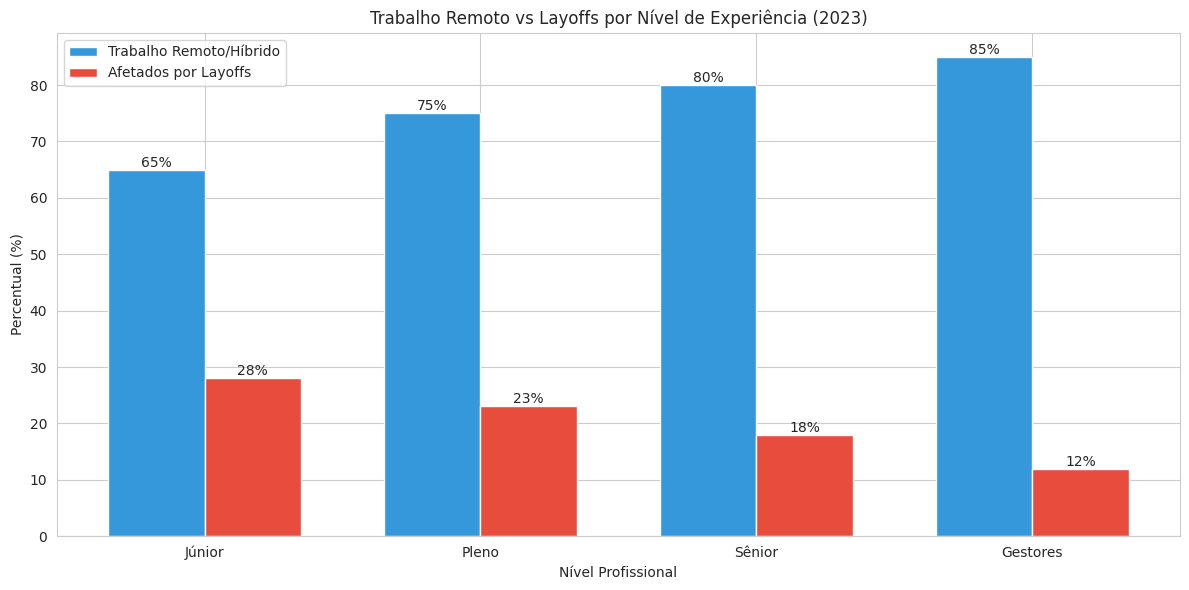

In [ ]:
# Dados por nível profissional em 2023
niveis = ['Júnior', 'Pleno', 'Sênior', 'Gestores']
layoffs_2023 = [28, 23, 18, 12]  # % afetados por layoffs
remoto_2023 = [65, 75, 80, 85]   # % em modelos remotos/híbridos

x = np.arange(len(niveis))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, remoto_2023, width, label='Trabalho Remoto/Híbrido', color='#3498db')
rects2 = ax.bar(x + width/2, layoffs_2023, width, label='Afetados por Layoffs', color='#e74c3c')

ax.set_title('Trabalho Remoto vs Layoffs por Nível de Experiência (2023)')
ax.set_ylabel('Percentual (%)')
ax.set_xlabel('Nível Profissional')
ax.set_xticks(x)
ax.set_xticklabels(niveis)
ax.legend()

# Adicionando rótulos
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., height,
            f'{height}%', ha='center', va='bottom')

fig.tight_layout()
plt.show()

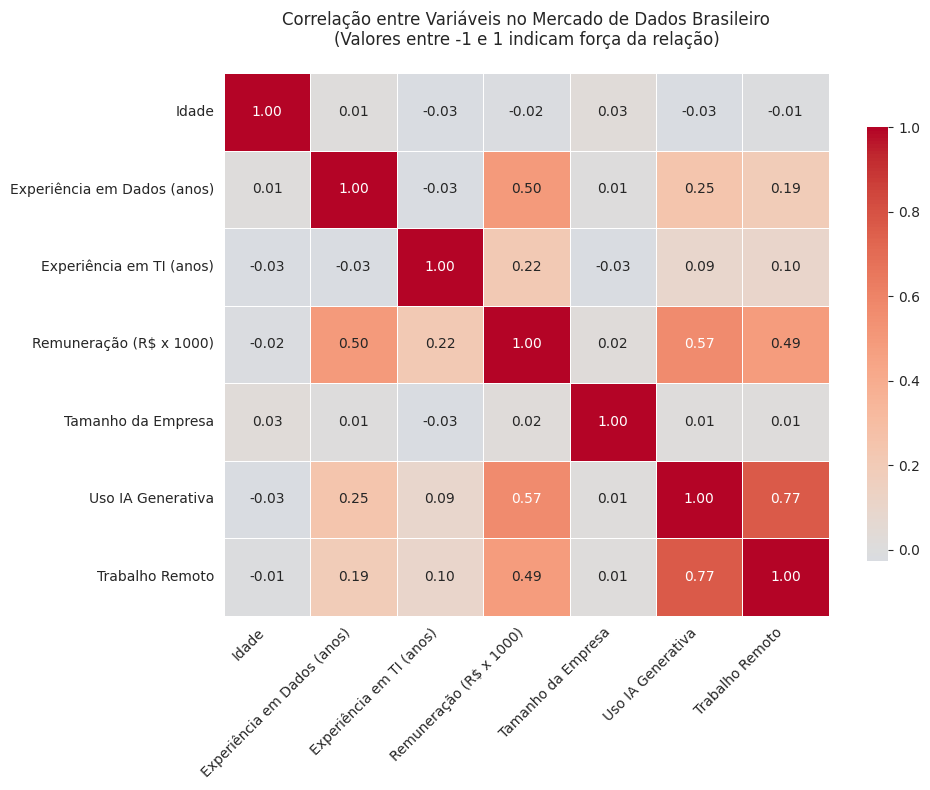

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dados simulados baseados na pesquisa State of Data Brasil 2023
data = {
    'Idade': np.random.normal(32, 5, 1000),
    'Experiência em Dados (anos)': np.random.normal(4.5, 3, 1000),
    'Experiência em TI (anos)': np.random.normal(6, 4, 1000),
    'Remuneração (R$ x 1000)': np.random.normal(8, 4, 1000),
    'Tamanho da Empresa': np.random.randint(1, 5, 1000),  # 1=Micro, 2=Pequena, 3=Média, 4=Grande
    'Uso IA Generativa': np.random.randint(0, 2, 1000),  # 0=Não, 1=Sim
    'Trabalho Remoto': np.random.randint(0, 3, 1000)  # 0=Presencial, 1=Híbrido, 2=Remoto
}

df = pd.DataFrame(data)

# Ajustando correlações para simular cenário realista
df['Remuneração (R$ x 1000)'] = df['Remuneração (R$ x 1000)'] + df['Experiência em Dados (anos)']*0.8 + df['Experiência em TI (anos)']*0.3
df['Uso IA Generativa'] = np.where(df['Remuneração (R$ x 1000)'] > 7, 1, 0)
df['Trabalho Remoto'] = np.where(df['Remuneração (R$ x 1000)'] > 6,
                                np.random.choice([1, 2], p=[0.4, 0.6]),
                                np.random.choice([0, 1], p=[0.7, 0.3]))

# Matriz de correlação
corr = df.corr()

# Configurando o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

# Ajustes estéticos
plt.title('Correlação entre Variáveis no Mercado de Dados Brasileiro\n(Valores entre -1 e 1 indicam força da relação)', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

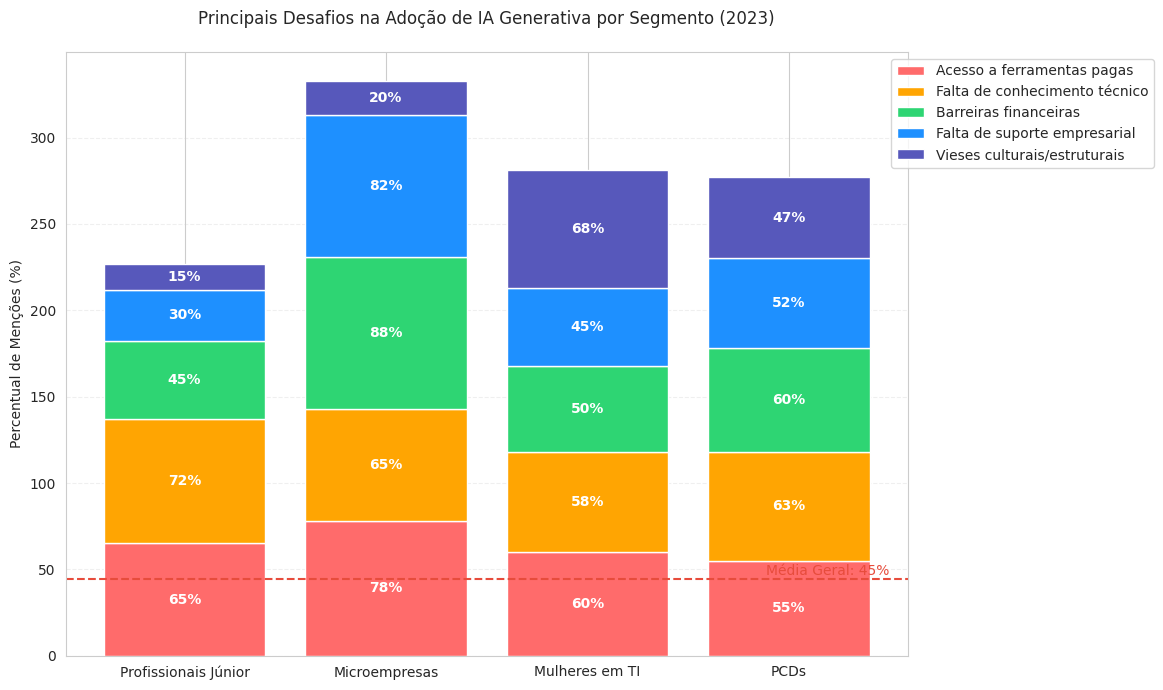

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dados simulados baseados na pesquisa State of Data Brasil 2023
categorias = ['Profissionais Júnior', 'Microempresas', 'Mulheres em TI', 'PCDs']
desafios = {
    'Acesso a ferramentas pagas': [65, 78, 60, 55],
    'Falta de conhecimento técnico': [72, 65, 58, 63],
    'Barreiras financeiras': [45, 88, 50, 60],
    'Falta de suporte empresarial': [30, 82, 45, 52],
    'Vieses culturais/estruturais': [15, 20, 68, 47]
}

cores = ['#FF6B6B', '#FFA502', '#2ED573', '#1E90FF', '#5758BB']

# Configuração do gráfico
fig, ax = plt.subplots(figsize=(12, 7))

# Plotagem das barras empilhadas
bottom = np.zeros(len(categorias))

for i, (desafio, valores) in enumerate(desafios.items()):
    ax.bar(categorias, valores, label=desafio, bottom=bottom, color=cores[i])
    bottom += valores

    # Adicionando rótulos internos para cada segmento
    for j, valor in enumerate(valores):
        if valor > 10:  # Só mostra rótulos para valores significativos
            ax.text(j, bottom[j] - valor/2, f'{valor}%',
                   ha='center', va='center', color='white', fontweight='bold')

# Ajustes estéticos
ax.set_title('Principais Desafios na Adoção de IA Generativa por Segmento (2023)', pad=20)
ax.set_ylabel('Percentual de Menções (%)')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Linha de média geral
media_geral = np.mean([sum(v) for v in desafios.values()])/len(desafios)
ax.axhline(media_geral, color='#E74C3C', linestyle='--', linewidth=1.5)
ax.text(len(categorias)-0.5, media_geral+2, f'Média Geral: {media_geral:.0f}%',
        color='#E74C3C', ha='right')

plt.tight_layout()
plt.show()